In [1]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import re                                #正则表达式，可用于匹配中文文本
import collections
import matplotlib.pyplot as plt

df = pd.read_csv("一级评论6.csv", encoding='utf-8') 


print(df.head())
print(len(df))



                content
0             想知道婴儿怎么办？
1         婴儿怎么办受害者怎么办？？
2        希望保护好这三个婴儿的隐私。
3  有一说一，去年高三生物可没少受这些人祸害
4         算不算潘多拉魔盒已经打开了
2264


In [2]:
df = df.dropna() #去除空值所在的整条(行)数据
print(len(df))

2264


In [3]:
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords


In [4]:
# 对句子去除停用词
def movestopwords(sentence):
    stopwords = stopwordslist('scu_stopwords.txt')
    outstr = ''
    for word in sentence:
        if word not in stopwords:
            if word != '\t'and'\n':
                outstr += word # outstr += " "
    return outstr


In [5]:
# 分词函数
def chinese_word_cut(mytext):
    import jieba.posseg as psg
    checkarr = ['n']
    returnmsg = "".join([(x.word) for x in psg.cut(mytext) if (x.flag in checkarr)])
    return returnmsg



In [6]:
 # 分词结果  
df = df.content.apply(chinese_word_cut)
ff = df.apply(movestopwords)
ff = ff.dropna()

print(ff) #预览

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.769 seconds.
Prefix dict has been built succesfully.


0          婴儿
1       婴儿受害者
2          婴儿
3       生物人祸害
4          魔盒
        ...  
2259       婴儿
2260      关键信
2261       小孩
2262         
2263         
Name: content, Length: 2264, dtype: object


In [7]:
word_counts = collections.Counter(ff) # 对分词做词频统计

word_counts_top10 = word_counts.most_common(11) # 获取前11最高频的词

word_counts_top10 = word_counts_top10[1:10]
print (word_counts_top10) 

[('婴儿', 71), ('孩子', 62), ('人', 26), ('人类', 21), ('基因编辑', 9), ('感觉', 9), ('事情', 8), ('基因编辑婴儿', 7), ('科学家', 7)]


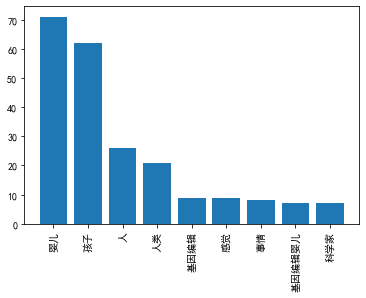

In [8]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

wa=dict(word_counts_top10)
plt.bar(wa.keys(),wa.values())
plt.xticks(rotation=90)
plt.show()

In [9]:
#从文件导入停用词表
stpwrdpath = "scu_stopwords.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read().decode('utf-8')#将停用词表转换为list
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()



In [10]:
# 调用sklearn机器学习包进行向量化
n_features = 1000 # 指定特征关键词提取最大值
tf_vectorizer = CountVectorizer(strip_accents='unicode',# 去除raw document中的重音符号
    max_features=n_features,#stop_words='english', # 停用词
    stop_words=stpwrdlst,
    max_df=0.5, # 阈值如果某个词的document frequence大于max_df，不当作关键词.float，词出现的次数与语料库文档数的百分比，int出现次数
    min_df=3) # 如果某个词的document frequence小于min_df，则这个词不会被当作关键词


tf = tf_vectorizer.fit_transform(df)
print(tf)
print('\nvocabulary list:\n\n',tf_vectorizer.get_feature_names())
print( '\nvocabulary dic :\n\n',tf_vectorizer.vocabulary_)

  (0, 16)	1
  (1, 18)	1
  (2, 16)	1
  (4, 45)	1
  (7, 17)	1
  (8, 16)	1
  (9, 38)	1
  (11, 7)	1
  (21, 22)	1
  (24, 23)	1
  (25, 16)	1
  (28, 45)	1
  (29, 16)	1
  (31, 28)	1
  (36, 7)	1
  (46, 16)	1
  (48, 27)	1
  (55, 20)	1
  (69, 23)	1
  (90, 4)	1
  (98, 16)	1
  (100, 20)	1
  (107, 12)	1
  (141, 20)	1
  (143, 0)	1
  :	:
  (2127, 12)	1
  (2132, 20)	1
  (2135, 41)	1
  (2136, 2)	1
  (2150, 16)	1
  (2180, 23)	1
  (2187, 16)	1
  (2198, 23)	1
  (2200, 20)	1
  (2201, 33)	1
  (2204, 20)	1
  (2208, 16)	1
  (2211, 16)	1
  (2212, 20)	1
  (2219, 6)	1
  (2220, 16)	1
  (2223, 16)	1
  (2234, 20)	1
  (2241, 38)	1
  (2246, 8)	1
  (2251, 20)	1
  (2253, 16)	1
  (2258, 16)	1
  (2259, 16)	1
  (2261, 22)	1

vocabulary list:

 ['事情', '事结果', '人伦', '人类', '人类人类', '人类基因', '代价', '医生', '受害者', '啥意思', '国家', '基因', '基因编辑', '基因编辑婴儿', '基因编辑意思', '太轻', '婴儿', '婴儿人权', '婴儿受害者', '婴儿无辜', '孩子', '孩子父母', '小孩', '底线', '建议', '意思', '感觉', '感觉有点', '成本', '技术', '教授', '有点', '电影', '疯子', '科学', '科学家', '科幻片', '科技', '科研底线', '细思', '能力', '行医',

In [11]:
# LDA操作
n_topics = 5 # 人为指定划分的主题数
lda = LatentDirichletAllocation(n_topics,learning_method='online',max_iter=50,random_state=0 )
lda.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [12]:
# 显示主题关键词函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('\nTopic Nr.%d:' % int(topic_idx + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
n_top_words = 10 # 主题输出前20个关键词
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)





Topic Nr.1:
孩子 63.88 | 医生 5.92 | 婴儿人权 3.18 | 事结果 3.08 | 人类人类 0.2 | 底线 0.2 | 成本 0.2 | 婴儿 0.2 | 科技 0.2 | 基因 0.2 | 

Topic Nr.2:
人类 20.69 | 感觉 9.08 | 事情 7.93 | 基因编辑婴儿 6.93 | 基因 4.31 | 科技 3.26 | 意思 3.19 | 技术 3.19 | 基因编辑意思 3.17 | 太轻 3.07 | 

Topic Nr.3:
行医 7.17 | 小孩 6.45 | 魔盒 4.88 | 细思 4.25 | 电影 4.15 | 评论 4.0 | 受害者 3.71 | 疯子 3.64 | 行医罪 3.3 | 人伦 3.24 | 

Topic Nr.4:
婴儿 74.21 | 底线 7.0 | 成本 6.0 | 人类人类 2.96 | 婴儿人权 0.2 | 事结果 0.2 | 科技 0.2 | 基因 0.2 | 基因编辑意思 0.2 | 医生 0.2 | 

Topic Nr.5:
基因编辑 9.03 | 科学家 7.16 | 啥意思 5.07 | 科幻片 5.03 | 国家 5.02 | 代价 4.68 | 科研底线 4.57 | 孩子父母 4.19 | 建议 3.21 | 能力 3.16 | 


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)

#让可视化可以在notebook内显示
pyLDAvis.show(data)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8909/    [Ctrl-C to exit]


127.0.0.1 - - [30/Jun/2020 22:28:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:28:21] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:28:21] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:28:21] "GET /LDAvis.js HTTP/1.1" 200 -
